**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


**Load Dataset**

In [2]:
DATA_PATH = "../data/processed/stock_features.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,stock,avg_return,volatility,avg_volume,risk_score,risk_cluster,risk_level
0,0P00009J3K,0.000908,0.010855,0.000000,2.465491,0,Low Risk
1,0P0000YWL0,0.000892,0.009143,0.000000,2.323655,0,Low Risk
2,20MICRONS,0.001608,0.033144,182613.489465,3.015731,0,Medium Risk
3,21STCENMGM,0.000964,0.015656,7113.078753,2.754893,0,Low Risk
4,360ONE,0.000605,0.029320,333390.270172,3.751664,2,High Risk


**Dataset Overview**

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)


Shape of dataset: (2078, 7)

Columns:
 Index(['stock', 'avg_return', 'volatility', 'avg_volume', 'risk_score',
       'risk_cluster', 'risk_level'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock         2078 non-null   object 
 1   avg_return    2078 non-null   float64
 2   volatility    2078 non-null   float64
 3   avg_volume    2078 non-null   float64
 4   risk_score    2078 non-null   float64
 5   risk_cluster  2078 non-null   int64  
 6   risk_level    2078 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 113.8+ KB


**Check Missing Values**

In [ ]:
#chekking for missing values
df.isnull().sum()


stock           0
avg_return      0
volatility      0
avg_volume      0
risk_score      0
risk_cluster    0
risk_level      0
dtype: int64

**Statistical Summary**

In [6]:
df.describe()


,avg_return,volatility,avg_volume,risk_score,risk_cluster
count,2078.000000,2078.000000,2.078000e+03,2078.000000,2078.000000
mean,0.002971,0.087160,1.647968e+06,3.297332,0.434552
std,0.027537,0.883643,8.696498e+06,0.705706,0.823522
min,-0.020889,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000583,0.025687,4.440961e+04,2.882474,0.000000
50%,0.001070,0.031900,1.753368e+05,3.203348,0.000000
75%,0.001723,0.036507,6.585812e+05,3.586184,0.000000
max,0.812614,28.450084,2.675987e+08,5.942218,2.000000


**Risk Level Distribution**

In [7]:
#risk level distribution
risk_counts = df["risk_level"].value_counts()
risk_counts

risk_level
High Risk      707
Low Risk       686
Medium Risk    685
Name: count, dtype: int64

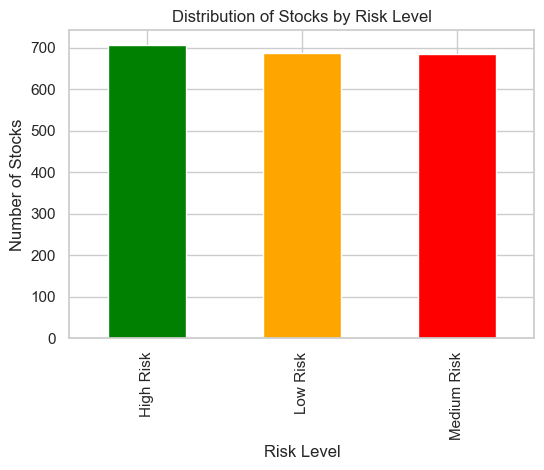

In [8]:
plt.figure(figsize=(6,4))
risk_counts.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Distribution of Stocks by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Stocks")
plt.show()


Stocks are evenly distributed across risk categories due to quantile-based classification.

**Average Return by Risk Level**

In [9]:
avg_return_risk = df.groupby("risk_level")["avg_return"].mean()
avg_return_risk

risk_level
High Risk      0.003929
Low Risk       0.002088
Medium Risk    0.002865
Name: avg_return, dtype: float64

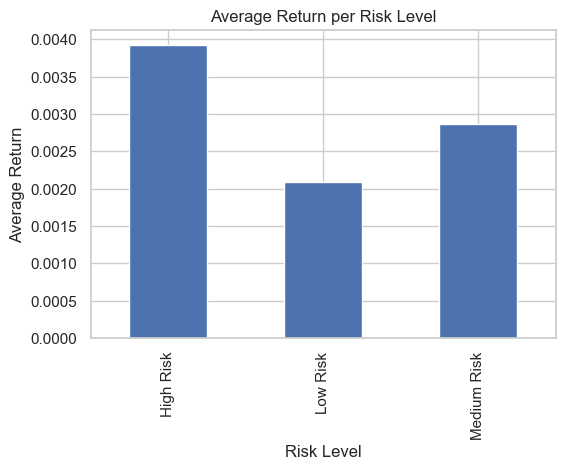

In [10]:
plt.figure(figsize=(6,4))
avg_return_risk.plot(kind="bar")
plt.title("Average Return per Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Average Return")
plt.show()


Higher risk categories generally yield higher average returns.

**Volatility by Risk Level**

In [11]:
volatility_risk = df.groupby("risk_level")["volatility"].mean()
volatility_risk


risk_level
High Risk      0.154148
Low Risk       0.031647
Medium Risk    0.073615
Name: volatility, dtype: float64

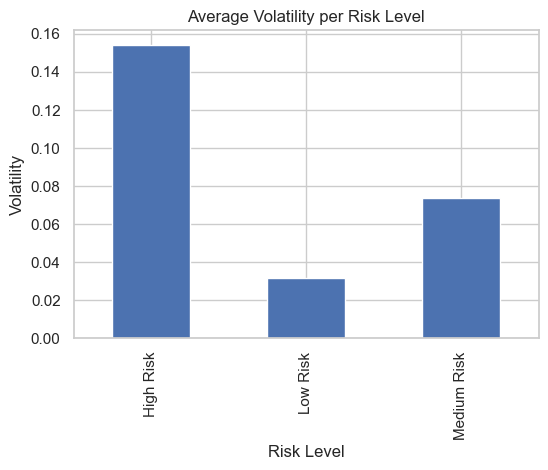

In [12]:
plt.figure(figsize=(6,4))
volatility_risk.plot(kind="bar")
plt.title("Average Volatility per Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Volatility")
plt.show()


Volatility increases from Low → High Risk, validating classification logic.

**Risk vs Return Scatter Plot**

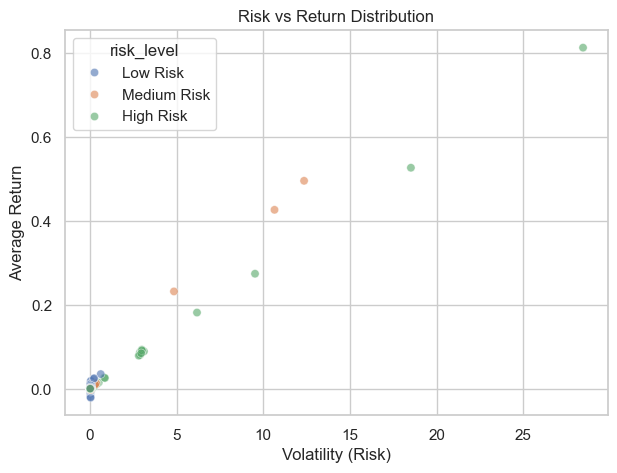

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="volatility",
    y="avg_return",
    hue="risk_level",
    alpha=0.6
)

plt.title("Risk vs Return Distribution")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Average Return")
plt.show()


**Risk Score Distribution**

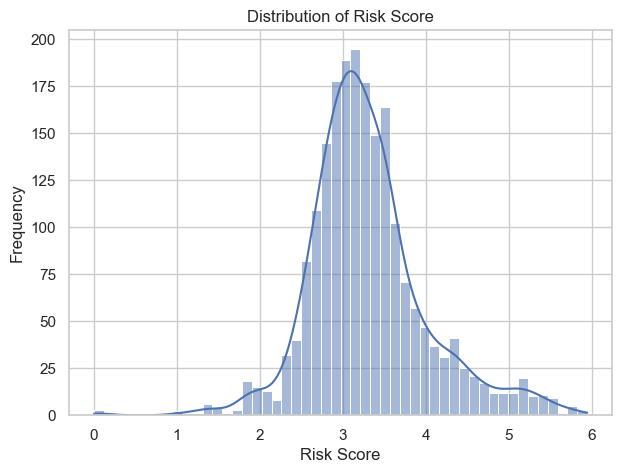

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(df["risk_score"], bins=50, kde=True)
plt.title("Distribution of Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.show()


Risk score follows a skewed distribution, justifying quantile-based classification.

**Top Stocks per Risk Category**

In [15]:
def top_stocks(risk, n=5):
    return (
        df[df["risk_level"] == risk]
        .sort_values("avg_return", ascending=False)
        .head(n)
        [["stock", "avg_return", "volatility", "risk_score"]]
    )

top_stocks("Low Risk")


,stock,avg_return,volatility,risk_score
781,HYBRIDFIN,0.035268,0.627621,2.930943
2011,VISESHINFO,0.025417,0.242828,2.352934
1505,RAJRILTD,0.023408,0.215838,2.320575
954,JSFB,0.019179,0.052036,1.308077
893,IREDA,0.016272,0.058635,1.521999


In [16]:
top_stocks("Medium Risk")


,stock,avg_return,volatility,risk_score
215,BALLARPUR,0.495558,12.358030,3.255500
1561,RNAVAL,0.426474,10.651192,3.256909
1592,SABTN,0.232150,4.850762,3.085846
1233,MON100,0.013206,0.362912,3.341989
1205,MICEL,0.013028,0.335447,3.279078


In [17]:

top_stocks("High Risk")

,stock,avg_return,volatility,risk_score
1654,SELMC,0.812614,28.450084,3.583693
1940,UJAAS,0.526665,18.520413,3.587920
1652,SEJALLTD,0.274270,9.527226,3.575824
1372,ORCHPHARMA,0.181821,6.180098,3.554526
1403,PATANJALI,0.093378,2.997761,3.498605


## 📌 Key Insights

- Stocks are evenly distributed across risk levels.
- Higher risk generally correlates with higher returns.
- Quantile-based classification is stable and interpretable.
- Risk score effectively captures volatility-return behavior.
- System supports informed, risk-aware investment decisions.
